Zadanie 1:
Wykonaj aproksymację średniokwadratową punktową populacji Stanów Zjednoczonych w przedziale [1900,1980] wielomianami stopnia m dla 0 ≤ m ≤ 6.

(a) Dla każdego m dokonaj ekstrapolacji wielomianu do roku 1990.
Porównaj otrzymaną wartość z prawdziwą wartością dla roku 1990, wynoszącą 248 709 873.
Ile wynosi błąd względny ekstrapolacji dla roku 1990? Dla jakiego m błąd względny był najmniejszy?

(b) Zbyt niski stopień wielomianu oznacza, że model nie jest w stanie uwzględnić zmienności danych (duże obciążenie).
Zbyt wysoki stopień wielomianu oznacza z kolei, że model uwzględnia szum lub błędy danych (duża wariancja), co w szczególności obserwowaliśmy w przypadku interpolacji.
Wielomian stopnia m posiada k = m + 1 parameterów.
Stopień wielomianu ,m, jest hiperparametrem modelu.
Do wyboru optymalnego stopnia wielomianu można posłużyć się kryterium informacyjnym Akaikego (ang. Akaike infor-mation criterion):

AIC = 2k+nln(∑ni=1[yi−ˆy(xi)]2n),
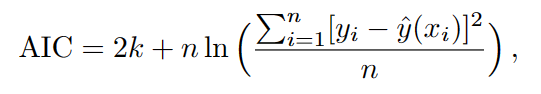

gdzie yi (i= 1, . . . , n) oznacza prawdziwą liczbę osób w roku xi, natomiast ˆy(xi) liczbę osób przewidywaną przez model, tzn wartość wielomianuˆy(x). Ponieważ rozmiar próbki jest niewielki (dane z dziewięciu lat,n= 9), n/k <40, należy użyć wzoru ze składnikiem korygującym:

AICc= AIC +2k(k+ 1)n−k−1.
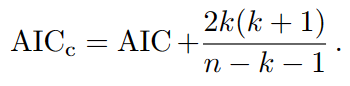

Mniejsze wartości kryterium oznaczają lepszy model. Czy wyznaczony w ten sposób stopień m, odpowiadający najmniejszej wartości AICc, pokrywa się z wartością z poprzedniego podpunktu?

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [2]:
# Data
years = np.array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980])
population = np.array([76212168, 92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203302031, 226542199])

population = np.float64(population)
years = np.float64(years)

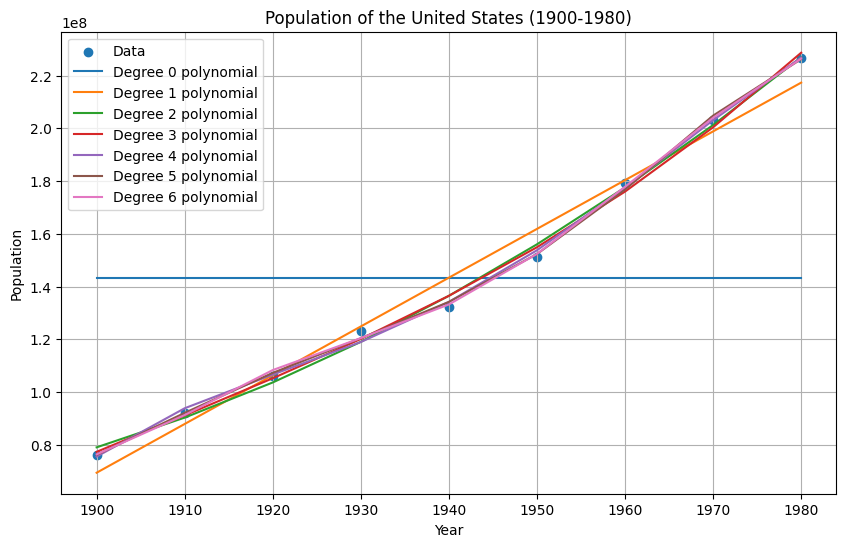

In [3]:
# Stopnie wielomianu
degrees = np.arange(7)

# Wielomiany aproksymujące
polynomials = [np.polyfit(years, population, deg) for deg in degrees]

# Wizualizacja wyników
plt.figure(figsize=(10, 6))
plt.scatter(years, population, label='Data')
for deg, poly in zip(degrees, polynomials):
    plt.plot(years, np.polyval(poly, years), label=f'Degree {deg} polynomial')

plt.title('Population of the United States (1900-1980)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


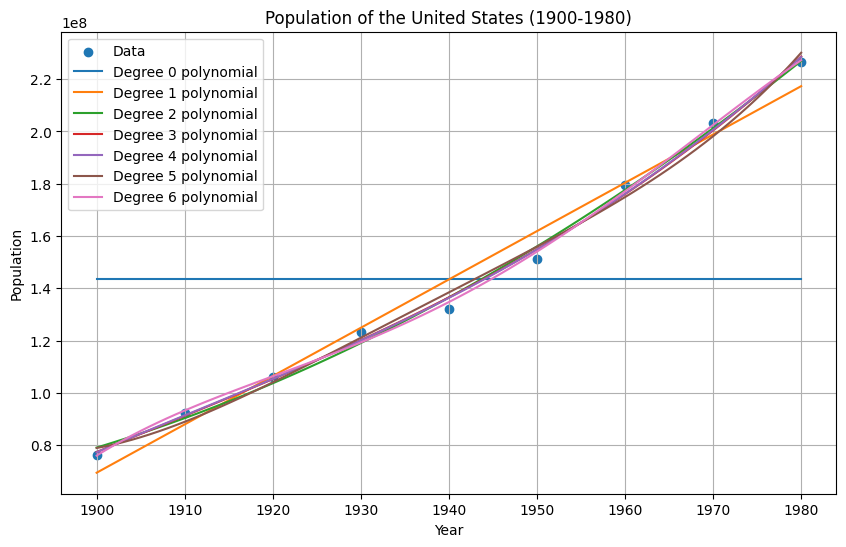

In [10]:
# Define basis functions S_k(x)
def basis_functions(x, k):
    return x ** k

# Construct the design matrix A
def construct_design_matrix(x, degree):
    m = len(x)
    A = np.zeros(shape=(m, degree + 1))
    for i in range(m):
        for j in range(degree + 1):
            A[i][j] = basis_functions(x[i], j)
    return A

# Calculate target vector y
def calculate_target_vector(x, y, degree):
    m = len(x)
    y_t = np.zeros(shape=(m))
    for i in range(m):
        y_t[i] = y[i]
    return y_t

# Stopnie wielomianu
degrees = np.arange(7)

# Wielomiany aproksymujące
polynomials = []

for deg in degrees:
    A = construct_design_matrix(years, deg)
    y_target = calculate_target_vector(years, population, deg)
    
    XTX = np.dot(A.T, A)  # X^T * X
    XTy = np.dot(A.T, y_target)  # X^T * y
    
    w_lin = np.linalg.solve(XTX, XTy)
    polynomials.append(w_lin)

# Wizualizacja wyników
plt.figure(figsize=(10, 6))
plt.scatter(years, population, label='Data')
years2 = np.arange(1900, 1981)
for deg, coeffs in zip(degrees, polynomials):
    poly = np.poly1d(coeffs[::-1])
    plt.plot(years2, poly(years2), label=f'Degree {deg} polynomial')

plt.title('Population of the United States (1900-1980)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Rzeczywista wartość populacji dla roku 1990
real_population_1990 = 248709873

# Funkcja obliczająca błąd względny
def relative_error(predicted, actual):
    return np.abs(predicted - actual) / actual

# Obliczanie wartości populacji dla roku 1990 dla każdego stopnia wielomianu
extrapolated_values_1990 = [np.polyval(poly[::-1], 1990) for poly in polynomials]

# Obliczanie błędów względnych dla każdego stopnia wielomianu
errors = [relative_error(pred, real_population_1990) for pred in extrapolated_values_1990]

# Indeks najmniejszego błędu względnego
min_error_index = np.argmin(errors)

# Wartość najmniejszego błędu względnego
min_error = errors[min_error_index]

print("Błąd względny dla roku 1990:")
for deg, error in zip(degrees, errors):
    print(f"Stopień {deg} wielomianu: {error:.10f}")
print("\nNajmniejszy błąd względny:")
print(f"Stopień {min_error_index} wielomianu: {min_error:.10f}")


Błąd względny dla roku 1990:
Stopień 0 wielomianu: 0.4235485077
Stopień 1 wielomianu: 0.0518747560
Stopień 2 wielomianu: 0.0241368447
Stopień 3 wielomianu: 0.0511800471
Stopień 4 wielomianu: 0.0456268814
Stopień 5 wielomianu: 0.1123002896
Stopień 6 wielomianu: 0.0065246588

Najmniejszy błąd względny:
Stopień 6 wielomianu: 0.0065246588


In [13]:
# Funkcja obliczająca wartość kryterium informacyjnego AICc dla danego stopnia wielomianu
def calculate_AICc(poly, n, k):
    y_pred = np.polyval(poly, years)
    residual_sum_of_squares = np.sum((population - y_pred)**2)
    AICc = 2 * k + n * np.log(residual_sum_of_squares / n)
    return AICc

# Obliczanie AICc dla każdego stopnia wielomianu
AICc_values = [calculate_AICc(poly[::-1], len(years), deg + 1) for deg, poly in enumerate(polynomials)]

# Wyznaczenie indeksu optymalnego stopnia wielomianu
optimal_degree_index = np.argmin(AICc_values)
optimal_degree = degrees[optimal_degree_index]

# Wyświetlenie wyników
print("Wartości kryterium informacyjnego AICc:")
for deg, aicc in zip(degrees, AICc_values):
    print(f"Stopień {deg} wielomianu: {aicc:.10f}")

print("\nNajlepszy stopień wielomianu:")
print(f"Stopień {optimal_degree} wielomianu: {AICc_values[optimal_degree_index]:.10f}")


Wartości kryterium informacyjnego AICc:
Stopień 0 wielomianu: 320.4395464818
Stopień 1 wielomianu: 287.0564781233
Stopień 2 wielomianu: 274.6533738966
Stopień 3 wielomianu: 274.8804016972
Stopień 4 wielomianu: 276.2591054071
Stopień 5 wielomianu: 285.7501659830
Stopień 6 wielomianu: 275.3156495513

Najlepszy stopień wielomianu:
Stopień 2 wielomianu: 274.6533738966


Zadanie 2:
Wykonaj aproksymację średniokwadratową ciągłą funkcji f(x) = √x w przedziale [0,2] wielomianem drugiego stopnia, używając wielomianów Czebyszewa. Aproksymacja ta jest tańszym obliczeniowo zamiennikiem aproksymacji jednostajnej.

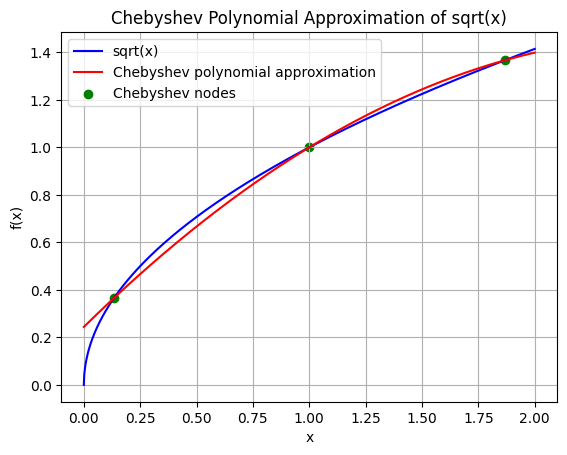

In [8]:
# Importowanie funkcji Chebyshev do obliczeń
from numpy.polynomial import Chebyshev as Cheb

# Definicja funkcji pierwiastka kwadratowego
def sqrt_func(x):
    return np.sqrt(x)

# Liczba węzłów (stopień wielomianu + 1)
n = 3

# Węzły Czebyszewa w przedziale [0, 2]
#cheb_nodes = (2 * np.arange(1, n + 1) - 1) / (2 * n)

def chebyshev_nodes(a, b, n):
    k = np.arange(1, n + 1)
    x_k = 0.5 * (a + b) + 0.5 * (b - a) * np.cos((2 * k - 1) * np.pi / (2 * n))
    return x_k

a = 0
b = 2
n = 3
cheb_nodes = chebyshev_nodes(a, b, n)

# Wartości funkcji w węzłach Czebyszewa
cheb_values = sqrt_func(cheb_nodes)

# Aproksymacja wielomianem Czebyszewa
approximation = Cheb.fit(cheb_nodes, cheb_values, deg=2)

# Wizualizacja wyników
x_values = np.linspace(0, 2, 1000)
plt.plot(x_values, sqrt_func(x_values), label='sqrt(x)', color='blue')
plt.plot(x_values, approximation(x_values), label='Chebyshev polynomial approximation', color='red')
plt.scatter(cheb_nodes, cheb_values, label='Chebyshev nodes', color='green')
plt.title('Chebyshev Polynomial Approximation of sqrt(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
def chebyshev_nodes(a, b, n):
    k = np.arange(1, n + 1)
    x_k = 0.5 * (a + b) + 0.5 * (b - a) * np.cos((2 * k - 1) * np.pi / (2 * n))
    return x_k

a = 0
b = 2
n = 3
cheb_nodes = chebyshev_nodes(a, b, n)

print("Węzły Czebyszewa:", cheb_nodes)


def func_sqrt_x(x):
    return np.sqrt(x)

func_values = func_sqrt_x(cheb_nodes)

print("Wartości funkcji w węzłach Czebyszewa:", func_values)


A = np.vstack([np.ones(n), cheb_nodes, cheb_nodes**2]).T
coefficients = np.linalg.lstsq(A, func_values, rcond=None)[0]

print("Współczynniki wielomianu aproksymacyjnego:", coefficients)


def polynomial(x, coeffs):
    return coeffs[0] + coeffs[1] * x + coeffs[2] * x**2

print("Wielomian aproksymacyjny:")
print("p(x) = {:.4f} + {:.4f}x + {:.4f}x^2".format(coefficients[0], coefficients[1], coefficients[2]))

Węzły Czebyszewa: [1.8660254 1.        0.1339746]
Wartości funkcji w węzłach Czebyszewa: [1.3660254 1.        0.3660254]
Współczynniki wielomianu aproksymacyjnego: [ 0.24401694  0.93461586 -0.17863279]
Wielomian aproksymacyjny:
p(x) = 0.2440 + 0.9346x + -0.1786x^2


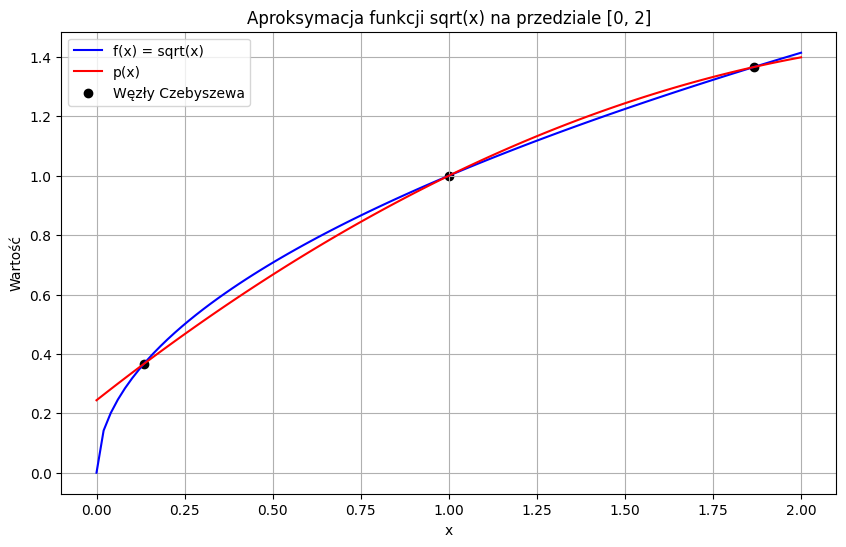

In [10]:
# Wartości x dla wykresu
x_values = np.linspace(a, b, 100)

# Wartości funkcji pierwiastka z x
true_values = func_sqrt_x(x_values)

# Wartości wielomianu aproksymacyjnego
approx_values = polynomial(x_values, coefficients)

# Wykres funkcji pierwiastka z x oraz wielomianu aproksymacyjnego
plt.figure(figsize=(10, 6))
plt.plot(x_values, true_values, label='f(x) = sqrt(x)', color='blue')
plt.plot(x_values, approx_values, label='p(x)', color='red')
plt.scatter(cheb_nodes, func_values, label='Węzły Czebyszewa', color='black')
plt.title('Aproksymacja funkcji sqrt(x) na przedziale [0, 2]')
plt.xlabel('x')
plt.ylabel('Wartość')
plt.legend()
plt.grid(True)
plt.show()


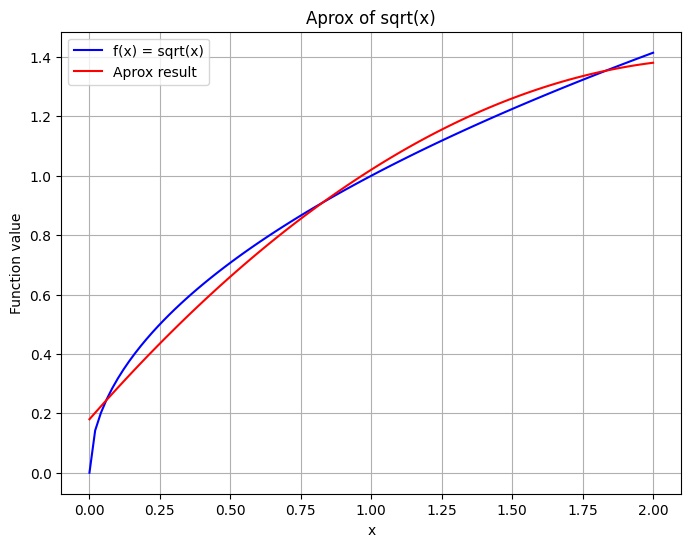

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the weight function
def w(x):
    return (1 - x**2) ** (-0.5)

# Define the function f(x)
def f(x):
    return np.sqrt(x+1)

# Define the number of terms in the sum
n = 2

# Define the x range for plotting
x_values = np.linspace(-1, 1, 100)
#print(x_values)
#print(f(x_values))

# Initialize the sum
result = np.zeros_like(x_values)


for i in range(len(x_values)):
# Perform the summation
    for k in range(n + 1):
        # Define the Legendre polynomials T_k

        if k == 0:
            T_k = lambda x: 1
        elif k == 1:
            T_k = lambda x: x
        elif k == 2:
            T_k = lambda x: 2*(x)**2 - 1

        integrand = lambda x: w(x) * f(x) * T_k(x)

        
        wise = quad(integrand, -1, 1)[0] * T_k(x_values[i])
        if k == 0:
            wise /= m.pi
        else:
            wise /= m.pi/2

        result[i] += wise

#print("Result: ", result)



# Wartości funkcji pierwiastka z x
true_values = f(x_values)

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(x_values+1, true_values, label='f(x) = sqrt(x)', color='blue')
plt.plot(x_values+1, result, label='Aprox result', color='red')
plt.xlabel('x')
plt.ylabel('Function value')
plt.title('Aprox of sqrt(x)')
plt.legend()
plt.grid(True)
plt.show()
